In [1]:
# -*- coding: utf-8 -*-
"""Lab-6-SVM.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Az59g2DkfeHUafr25_b2GR321r7kn0kN
"""

import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9851851851851852

RBF Kernel Results:
Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Linear Kernel Results:
Accuracy: 0.9667

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



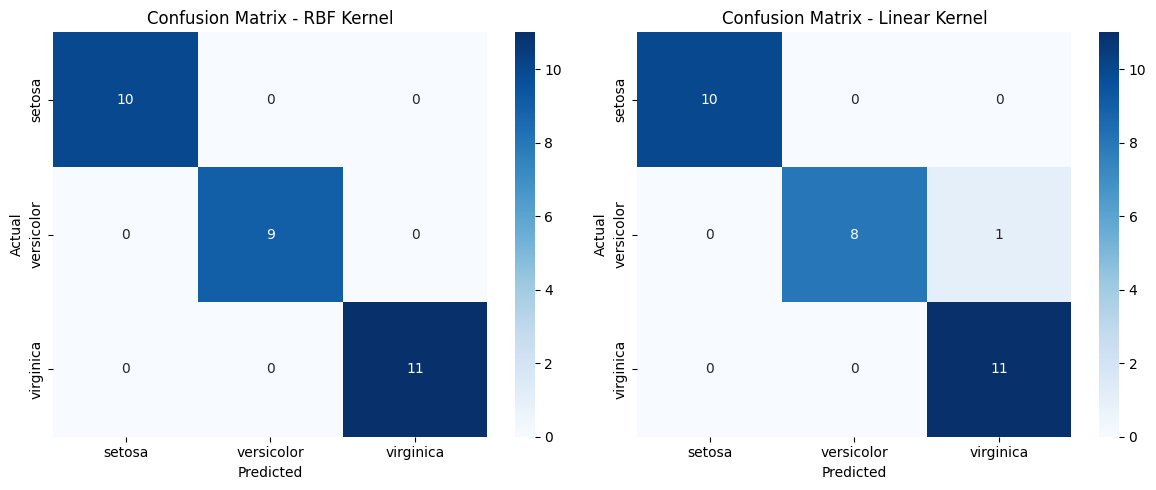

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Create and train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate RBF kernel model
print("RBF Kernel Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nConfusion Matrix:")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(cm_rbf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

# Evaluate Linear kernel model
print("\nLinear Kernel Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nConfusion Matrix:")
cm_linear = confusion_matrix(y_test, y_pred_linear)
print(cm_linear)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Accuracy: 0.95


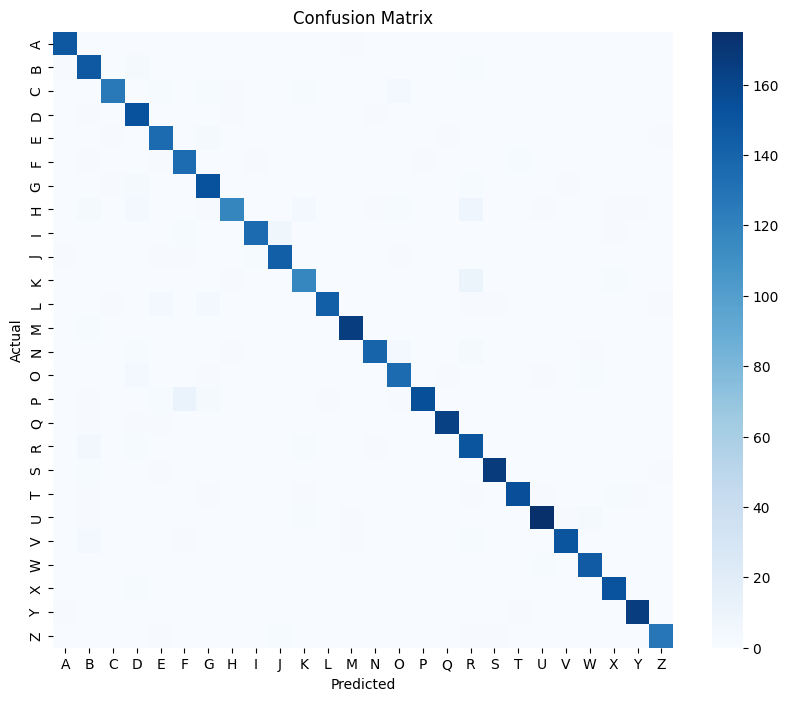

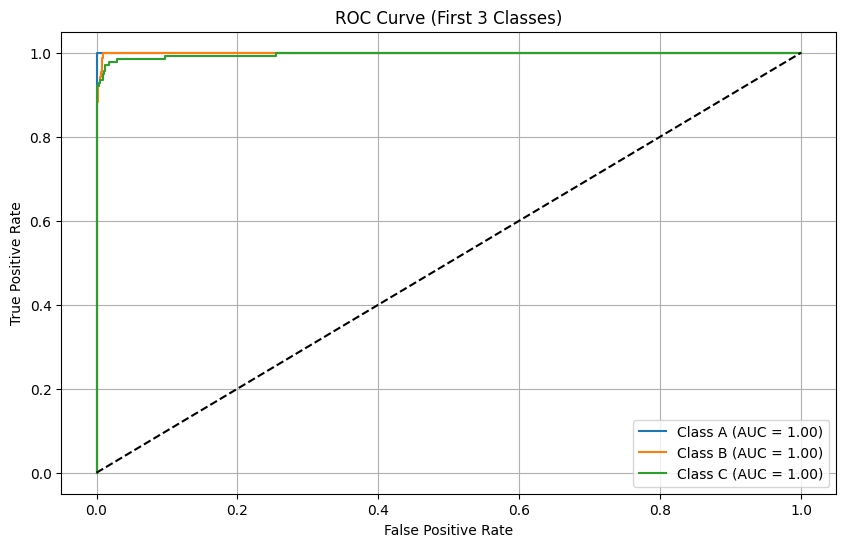

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("/content/letter-recognition.csv")

# Split features and target
X = df.drop('letter', axis=1)
y = df['letter']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with RBF kernel
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Accuracy and Confusion Matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Binarize test labels for ROC/AUC
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_score = svm.predict_proba(X_test_scaled)

# ROC and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for first 3 classes (to reduce clutter)
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (First 3 Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
